In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
def str_to_dict(s):
    import re
    x = re.split(",", s[1:-1])
    res = dict()
    for i in x:
        key, value = i.strip().split(":")
        res[key[1:-1]] = float(value)
    return res

def make_smooth(value,window=10):
    new_value=[]
    for i in range(len(value)):
        start=max(i-window,0)
        final=min(len(value),i+window)
        new_value.append(sum(value[start:final])/(final-start))
    return new_value

def get_name(s):
    s=s.upper()
    if "HVP" in s:
        return "HVP_RVR"
    if "SGD" in s:
        if "MOMENTUM_0.9" in s :
            return "Momentum_SGD"
        else:
            return "SGD"
    if "SCRN" in s:
        return "SCRN"
    if "ADAM" in s:
        return "Adam"
    if "STORM" in s:
        return "Storm"
    return "SHARP"

def plot_ris(dir, axs, keys,name,y_lim=None,smooth=False,color=None,combine_keys=None):
    a = open(dir, 'r')
    a = a.read().split('\n')[:-1]
    a = [str_to_dict(b) for b in a]
    a=a[:300]
    for i,key in enumerate(keys):
        values = [s[key] for s in a]
        if smooth:
            values=make_smooth(values)
        axs[i].plot(np.arange(len(values)), values, label=get_name(name),color=color)
        axs[i].set_title(key)
        axs[i].legend(loc='upper center',  bbox_to_anchor=(0.5, 1.3),
          ncol=4, fancybox=True,)
        if y_lim is not None:
            axs[i].set_ylim(y_lim[i])
    if combine_keys is not None:
        for j, x in enumerate(combine_keys):
            x,y,f=x
            i=len(keys)+j
            
            values = [f(s[x],s[y]) for s in a]
            if smooth:
                x=make_smooth([s[x] for s in a])
                y=make_smooth([s[y] for s in a])
                values = make_smooth([f(x1,y1) for x1,y1 in zip(x,y)])
            axs[i].plot(np.arange(len(values)), values, label=name,color=color)
            axs[i].set_title("combine_keys")
            axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=4, fancybox=True,)
            
    return 0

def get_ylim(dir,keys):
    y_lim=[]
    names = os.listdir(dir)
    for key in keys:
        max_,min_=None,None
        for i,name in enumerate(names):
            if name[0]==".":
                continue
            a = open(dir+name, 'r')
            a = a.read().split('\n')[:-1]
            a = [str_to_dict(b) for b in a]
            a=a[:300]
            values = [s[key] for s in a]
            if max_ is None:
                max_=max(values)
            if min_ is None:
                min_ = min(values)
            max_=max(max_,max(values))
            min_=min(min_,min(values))
        
        y_lim.append([0.95*min_,1.05*max_])
    
    return y_lim
def plot_time_ris(dir, axs, keys,name,time,y_lim=None,smooth=False,color=None,combine_keys=None,time_limit=300):
    a = open(dir, 'r')
    a = a.read().split('\n')[:-1]
    a = [str_to_dict(b) for b in a]
    a=a[:300]
    for i,key in enumerate(keys):
        values = [s[key] for s in a]
        if smooth:
            values=make_smooth(values)
        axs[i].plot(np.arange(len(values))*time, values, label=get_name(name),color=color)
        axs[i].set_title(key)
        axs[i].legend(loc='upper center',  bbox_to_anchor=(0.5, 1.3),
          ncol=4, fancybox=True,)
        if y_lim is not None:
            axs[i].set_ylim(y_lim[i])
        axs[i].set_xlim([0,time_limit])
    if combine_keys is not None:
        for j, x in enumerate(combine_keys):
            x,y,f=x
            i=len(keys)+j
            
            values = [f(s[x],s[y]) for s in a]
            if smooth:
                x=make_smooth([s[x] for s in a])
                y=make_smooth([s[y] for s in a])
                values = make_smooth([f(x1,y1) for x1,y1 in zip(x,y)])
            axs[i].plot(np.arange(len(values)), values, label=name,color=color)
            axs[i].set_title("combine_keys")
            axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          ncol=4, fancybox=True,)
            
    return 0

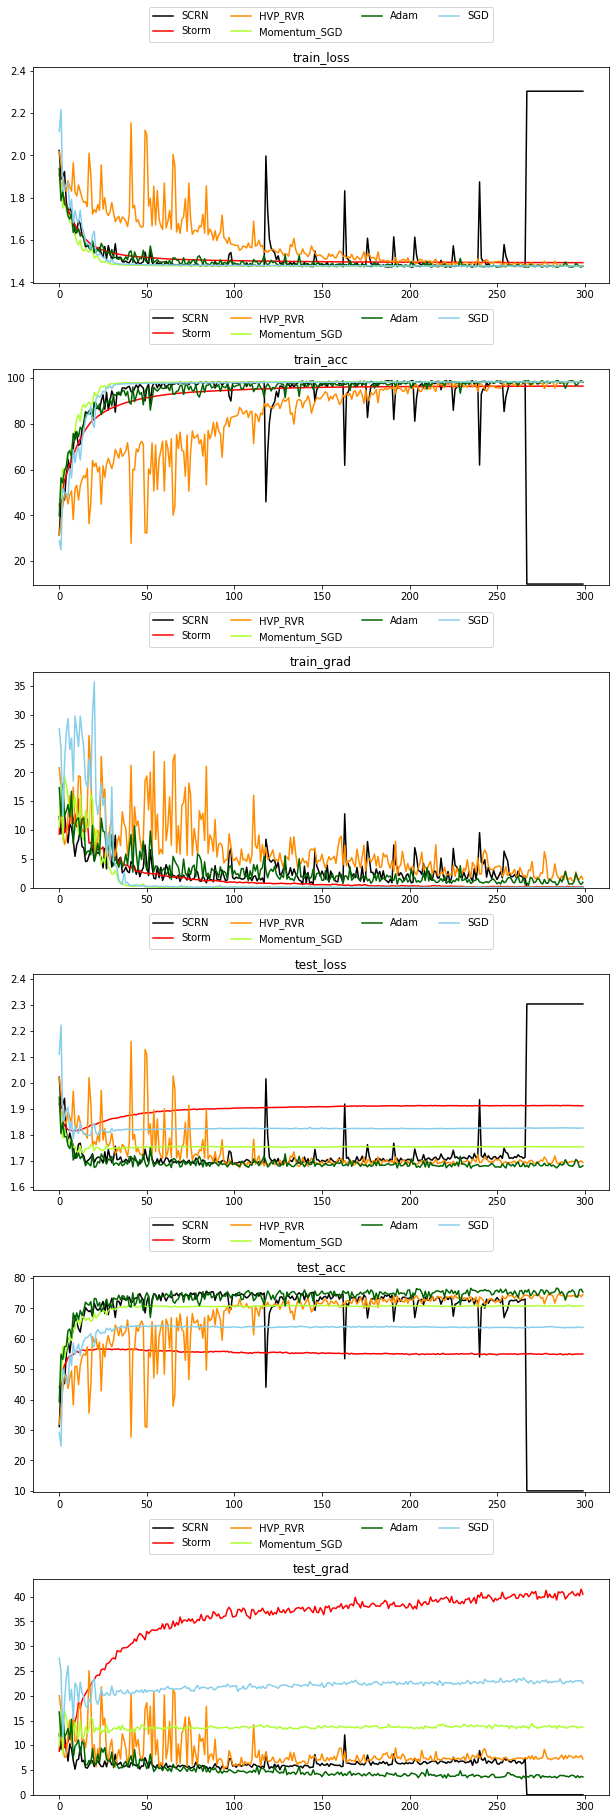

In [23]:
dir='Cifar10/ResNet1/'
keys=['train_loss','train_acc','train_grad','test_loss','test_acc','test_grad']
y_lim=[[1.5,2],[35,50],[1,2.5],[1.6,2],[35,45],[1,2.5]]
fig, axs = plt.subplots(6, figsize=(10, 30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
colors=['black','red','darkorange','greenyellow','darkgreen','skyblue','midnightblue','pink','slategrey','purple']
names = os.listdir(dir)
combine_keys=[('train_grad','test_grad',lambda x,y: x-y)]
y_lim=get_ylim(dir,keys)
for i,name in enumerate(names):
    if name[0]==".":
        continue
    plot_ris(dir + name, axs, keys=keys,name=name,y_lim=y_lim,smooth=False,color=colors[i%len(colors)],combine_keys=None)
plt.savefig("prova.png")
plt.show()

from PIL import Image
im=Image.open('prova.png')
im=np.array(im)[148:-156]
if not os.path.exists("Figure/"+dir):
        os.makedirs("Figure/"+dir)
for i in range(6):
    x=im[i*302:(i+1)*302]
    Image.fromarray(x).save("Figure/"+dir+keys[i]+".png")

In [77]:
Cifar100_time={}
Cifar100_time['OneLayerLinearNet']=[
    ("SGD",3.02),
    ("Momentum_SGD",3.07),
    ("Adam",3.14),
    ("Storm",3.17),
    ("SCRN",3.18),
    ("HVP_RVR",3.01),
    ("SHARP",2.51),
]

Cifar100_time['ResNet']=[
    ("SGD",9.05),
    ("Momentum_SGD",8.47),
    ("Adam",8.76),
    ("Storm",9.67),
    ("SCRN",32.63),
    ("HVP_RVR",8.94),
    ("SHARP",32.20),
]
Cifar100_time['LinearAutoEncoder']=[
    ("SGD",5.78),
    ("Momentum_SGD",5.64),
    ("Adam",5.42),
    ("Storm",6.11),
    ("SCRN",6.45),
    ("HVP_RVR",5.98),
    ("SHARP",5.43),
]

Cifar10_time={}
Cifar10_time['OneLayerLinearNet']=[
    ("SGD",3.03),
    ("Momentum_SGD",2.82),
    ("Adam",2.84),
    ("Storm",2.87),
    ("SCRN",3.29),
    ("HVP_RVR",2.78),
    ("SHARP",2.58),
]

Cifar10_time['ResNet']=[
    ("SGD",8.98),
    ("Momentum_SGD",8.47),
    ("Adam",8.78),
    ("Storm",9.70),
    ("SCRN",32.49),
    ("HVP_RVR",149.33),
    ("SHARP",31.50),
]
Cifar10_time['LinearAutoEncoder']=[
    ("SGD",5.75),
    ("Momentum_SGD",5.08),
    ("Adam",5.14),
    ("Storm",5.72),
    ("SCRN",6.18),
    ("HVP_RVR",5.26),
    ("SHARP",5.55),
]

MNIST_time={}
MNIST_time['OneLayerLinearNet']=[
    ("SGD",2.15),
    ("Momentum_SGD",1.88),
    ("Adam",1.91),
    ("Storm",1.96),
    ("SCRN",2.19),
    ("HVP_RVR",1.97),
    ("SHARP",1.94),
]

MNIST_time['ResNet']=[
    ("SGD",9.10),
    ("Momentum_SGD",8.49),
    ("Adam",8.81),
    ("Storm",9.86),
    ("SCRN",35.55),
    ("HVP_RVR",33.79),
    ("SHARP",34.54),
]
MNIST_time['LinearAutoEncoder']=[
    ("SGD",3.90),
    ("Momentum_SGD",3.58),
    ("Adam",3.93),
    ("Storm",4.12),
    ("SCRN",4.56),
    ("HVP_RVR",3.77),
    ("SHARP",4.44),
]

[[0.21541659884775677, 0.8894681283086538], [79.07958333333332, 98.51625000000001], [0.133391645103499, 0.49174567876849323], [0.24808537971228362, 0.8624812889099122], [79.6955, 97.49249999999999], [0.14073220835765823, 0.4871170056704432]]


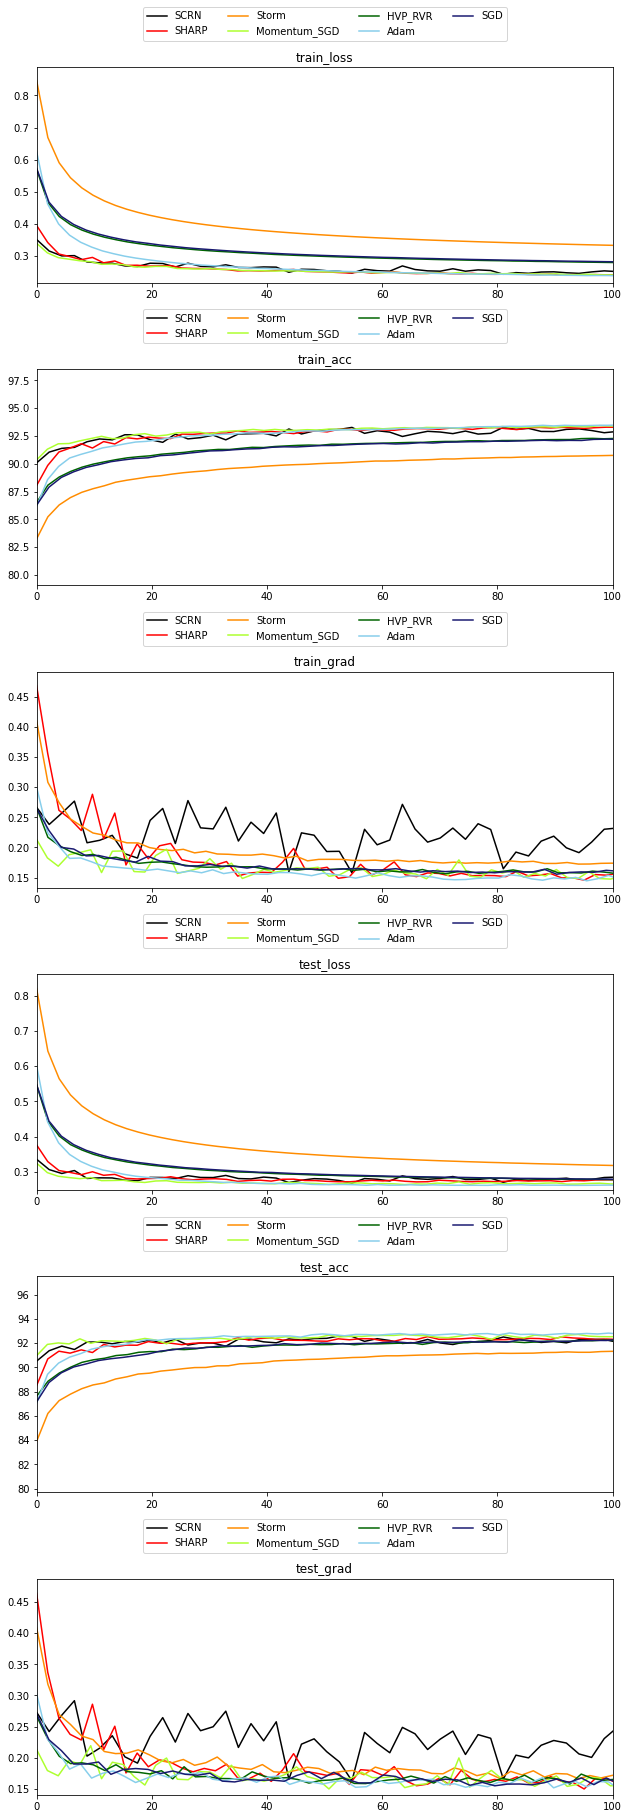

In [86]:
dir='MNIST/OneLayerLinearNet/'
times=MNIST_time['OneLayerLinearNet']
keys=['train_loss','train_acc','train_grad','test_loss','test_acc','test_grad']
fig, axs = plt.subplots(6, figsize=(10, 30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
colors=['black','red','darkorange','greenyellow','darkgreen','skyblue','midnightblue','pink','slategrey','purple']
names = os.listdir(dir)
combine_keys=[('train_grad','test_grad',lambda x,y: x-y)]

y_lim=get_ylim(dir,keys)
print(y_lim)
for i,name in enumerate(names):
    if name[0]==".":
        continue
    time=0
    for j in times:
        if get_name(name)==j[0]:
            time=j[1]
            break
    plot_time_ris(dir + name, axs, keys=keys,time=time,time_limit=100,name=name,y_lim=y_lim,smooth=False,color=colors[i%len(colors)],combine_keys=None)
plt.savefig("prova.png")
plt.show()

from PIL import Image
im=Image.open('prova.png')
im=np.array(im)[148:-156]
if not os.path.exists("Resource/"+dir):
        os.makedirs("Resource/"+dir)
for i in range(6):
    x=im[i*302:(i+1)*302]
    Image.fromarray(x).save("Resource/"+dir+keys[i]+".png")

[[2.6200285270810124e-05, 0.0006204169535636902], [0.010126185171167888, 1.182413273924729], [3.142001220025122e-05, 0.0006238621352612972], [0.010088440315616936, 1.188964236632455]]


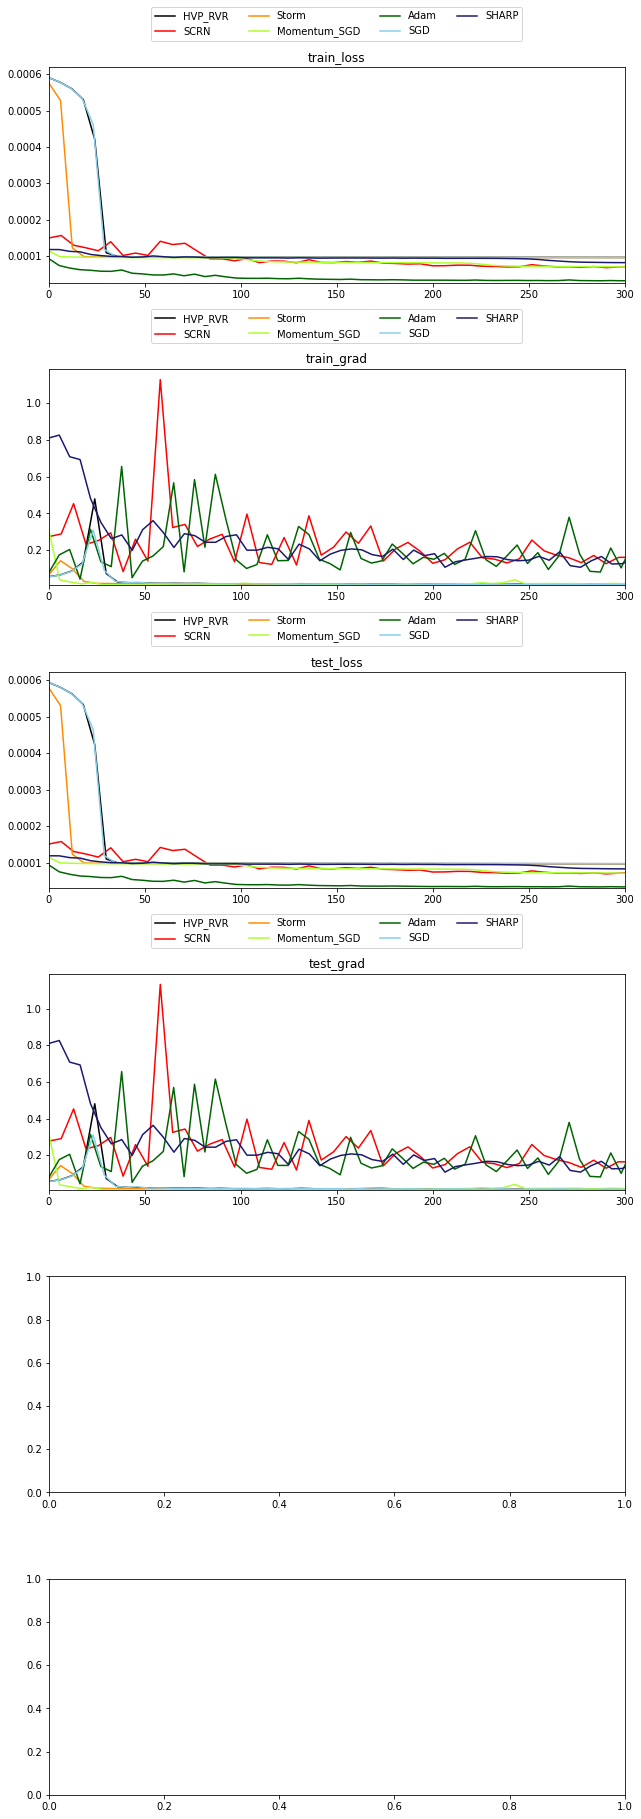

IndexError: list index out of range

In [89]:
dir='Cifar100/LinearAutoEncoder/'
times=Cifar100_time['LinearAutoEncoder']

keys=['train_loss','train_grad','test_loss','test_grad']
fig, axs = plt.subplots(6, figsize=(10, 30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
colors=['black','red','darkorange','greenyellow','darkgreen','skyblue','midnightblue','pink','slategrey','purple']
names = os.listdir(dir)
combine_keys=[('train_grad','test_grad',lambda x,y: x-y)]

y_lim=get_ylim(dir,keys)
print(y_lim)
for i,name in enumerate(names):
    if name[0]==".":
        continue
    time=0
    for j in times:
        if get_name(name)==j[0]:
            time=j[1]
            break
    plot_time_ris(dir + name, axs, keys=keys,time=time,time_limit=300,name=name,y_lim=y_lim,smooth=False,color=colors[i%len(colors)],combine_keys=None)
plt.savefig("prova.png")
plt.show()

from PIL import Image
im=Image.open('prova.png')
im=np.array(im)[148:-156]
if not os.path.exists("Resource/"+dir):
        os.makedirs("Resource/"+dir)
for i in range(6):
    x=im[i*302:(i+1)*302]
    Image.fromarray(x).save("Resource/"+dir+keys[i]+".png")

In [70]:
(2160-156-156)/6

308.0

In [20]:
train_acc=[]
test_acc=[]
train_grad=[]
test_grad=[]

In [13]:
import os
dataset="Cifar100"
model='ResNet1'
optimizer='HVP_RVR_SGD_lr_0.1_b_0.3_sigma2_1_l2_10'
dir=dataset+"/"+model+"/"+optimizer
a = open(dir, 'r')
a = a.read().split('\n')[:-1]
a = [str_to_dict(b) for b in a]
a=a[:300]
a.sort(key=lambda x :x['test_acc'],reverse=True)
train_acc.append(a[0]['train_acc'])
test_acc.append(a[0]['test_acc'])
train_grad.append(a[0]['train_grad'])
test_grad.append(a[0]['test_grad'])
ge=[x-y for x,y in zip(train_grad,test_grad)]
r1=np.mean(train_acc)
r2=max(max(train_acc)-np.mean(train_acc),np.mean(train_acc)-min(train_acc))
r3=np.mean(test_acc)
r4=max(max(test_acc)-np.mean(test_acc),np.mean(test_acc)-min(test_acc))
r5=np.mean(train_grad)
r6=max(max(train_grad)-np.mean(train_grad),np.mean(train_grad)-min(train_grad))
r7=np.mean(test_grad)
r8=max(max(test_grad)-np.mean(test_grad),np.mean(test_grad)-min(test_grad))
r9=np.mean(ge)

r10=max(max(ge)-np.mean(ge),np.mean(ge)-min(ge))
print("Sharp &{0:.2f} $\,\pm\,$ {1:.2f} & {2:.2f} $\,\pm\,$ {3:.2f} & {4:.2f} $\,\pm\,$ {5:.2f} & {6:.2f} $\,\pm\,$ {7:.2f} & {8:.2f} $\,\pm\,$ {9:.2f} \\\\".format(r1,r2,r3,r4,r5,r6,r7,r8,r9,r10))

Sharp &98.21 $\,\pm\,$ 0.00 & 74.57 $\,\pm\,$ 0.00 & 1.43 $\,\pm\,$ 0.00 & 7.29 $\,\pm\,$ 0.00 & -5.86 $\,\pm\,$ 0.00 \\


In [38]:
import os
dataset="Cifar100"
model='ResNet'
threshold=80
optimizer='SHARP_alpha_0.9_eta_1'
dir=dataset+"/"+model+"/"+optimizer
a = open(dir, 'r')
a = a.read().split('\n')[:-1]
a = [str_to_dict(b) for b in a]
a=a[:300]
x=None
for i in range(len(a)):
    if a[i]['train_acc']>=threshold:
        x=a[i]
        break
train_acc.append(x['train_acc'])
test_acc.append(x['test_acc'])
train_grad.append(x['train_grad'])
test_grad.append(x['test_grad'])
ge=[x-y for x,y in zip(train_grad,test_grad)]
r1=np.mean(train_acc)
r2=max(max(train_acc)-np.mean(train_acc),np.mean(train_acc)-min(train_acc))
r3=np.mean(test_acc)
r4=max(max(test_acc)-np.mean(test_acc),np.mean(test_acc)-min(test_acc))
r5=np.mean(train_grad)
r6=max(max(train_grad)-np.mean(train_grad),np.mean(train_grad)-min(train_grad))
r7=np.mean(test_grad)
r8=max(max(test_grad)-np.mean(test_grad),np.mean(test_grad)-min(test_grad))
r9=np.mean(ge)

r10=max(max(ge)-np.mean(ge),np.mean(ge)-min(ge))
print("Sharp &{0:.2f} $\,\pm\,$ {1:.2f} & {2:.2f} $\,\pm\,$ {3:.2f} & {4:.2f} $\,\pm\,$ {5:.2f}\\\\".format(r3,r4,r7,r8,r9,r10))

Sharp &35.65 $\,\pm\,$ 0.37 & 13.91 $\,\pm\,$ 0.27 & -6.92 $\,\pm\,$ 0.35\\


In [168]:
train_loss=[]
test_loss=[]
train_grad=[]
test_grad=[]

In [171]:
import os
dataset="MNIST"
model='LinearAutoEncoder1'
optimizer='HVP_RVR_SGD_lr_0.1_b_0.3_sigma2_0.1_l2_0.1'
dir=dataset+"/"+model+"/"+optimizer
a = open(dir, 'r')
a = a.read().split('\n')[:-1]
a = [str_to_dict(b) for b in a]
a=a[:300]
a.sort(key=lambda x :x['test_loss'],reverse=False)
train_loss.append(a[0]['train_loss'])
test_loss.append(a[0]['test_loss'])
train_grad.append(a[0]['train_grad'])
test_grad.append(a[0]['test_grad'])
ge=[x-y for x,y in zip(train_grad,test_grad)]
r1=np.mean(train_loss)
r2=max(max(train_loss)-np.mean(train_loss),np.mean(train_loss)-min(train_loss))
r3=np.mean(test_loss)
r4=max(max(test_loss)-np.mean(test_loss),np.mean(test_loss)-min(test_loss))
r5=np.mean(train_grad)
r6=max(max(train_grad)-np.mean(train_grad),np.mean(train_grad)-min(train_grad))
r7=np.mean(test_grad)
r8=max(max(test_grad)-np.mean(test_grad),np.mean(test_grad)-min(test_grad))
r9=np.mean(ge)
r10=max(max(ge)-np.mean(ge),np.mean(ge)-min(ge))
print(" {0:.2e} $\pm$ {1:.2e} & {2:.2e} $\pm$ {3:.2e} & {4:.2e} $\pm$ {5:.2e} & {6:.2e} $\pm$ {7:.2e} & {8:.2e} $\pm$ {9:.2e}".format(r1,r2,r3,r4,r5,r6,r7,r8,r9,r10))

 1.24e-04 $\pm$ 3.35e-07 & 1.24e-04 $\pm$ 3.49e-07 & 1.10e-02 $\pm$ 9.43e-04 & 1.23e-02 $\pm$ 1.17e-03 & -1.29e-03 $\pm$ 3.98e-04


In [111]:

a[0]

{'train_loss': 3.309787633419037,
 'train_acc': 25.134,
 'train_grad': 1.528635023161769,
 'test_loss': 3.6711108803749086,
 'test_acc': 18.3,
 'test_grad': 1.5573767203837634}

25.134 0.0
18.3 0.0
1.528635023161769 0.0
1.5573767203837634 0.0
-0.02874169722199449 0.0


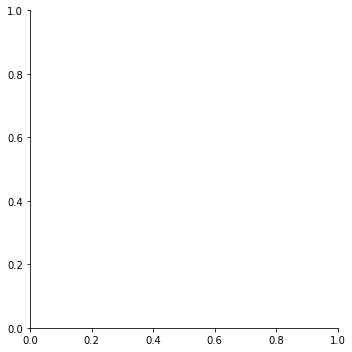

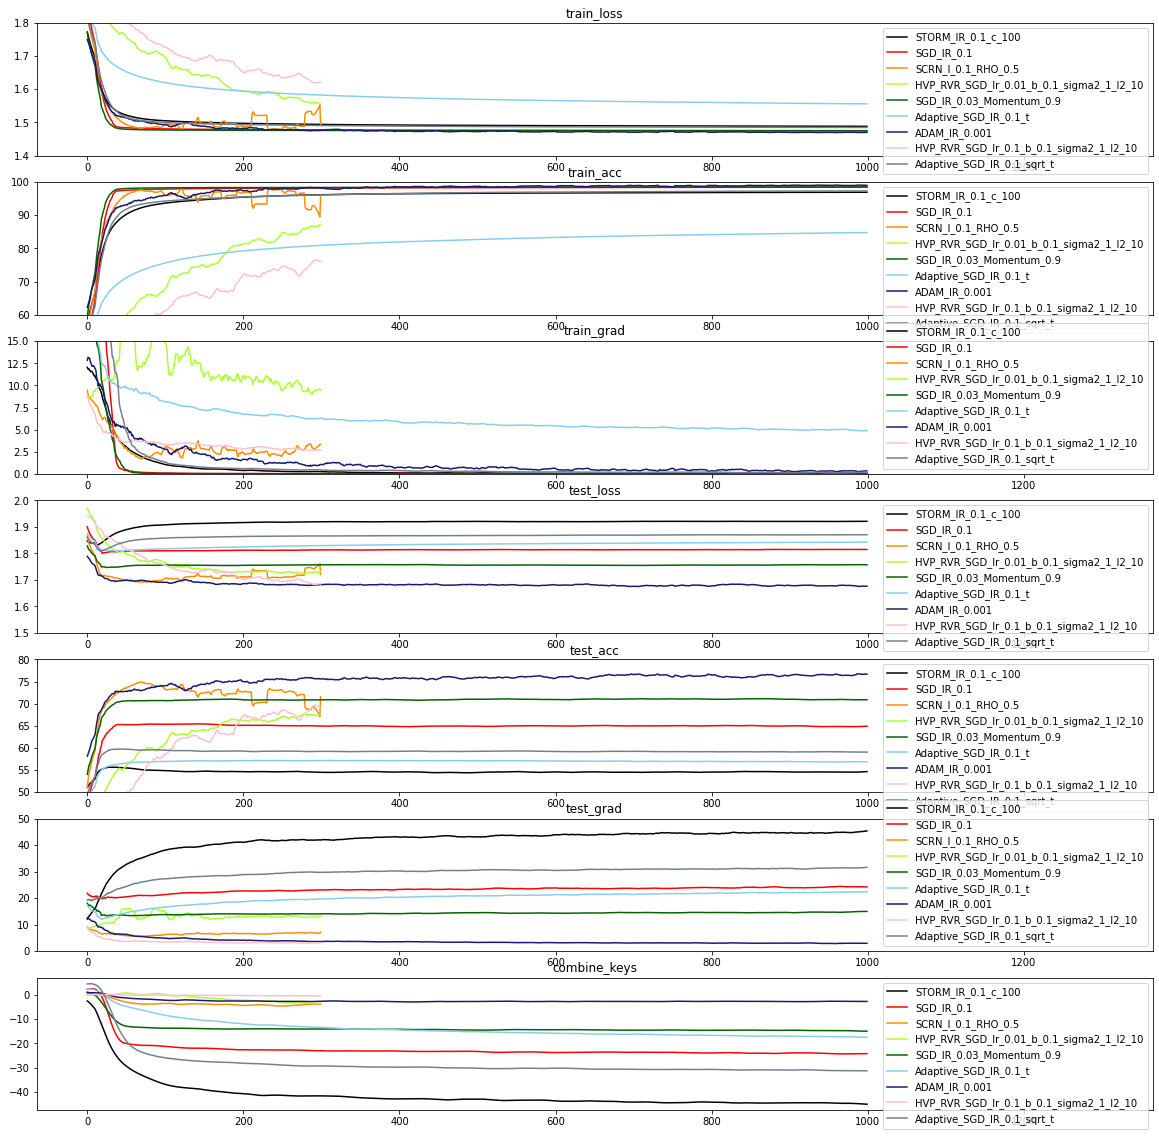

In [69]:
dir='Final_logs/Classifier/ResNet/'
keys=['train_loss','train_acc','train_grad','test_loss','test_acc','test_grad']
y_lim=[[1.4,1.8],[60,100],[0,15],[1.5,2],[50,80],[0,50]]
fig, axs = plt.subplots(7, figsize=(20, 20))
colors=['black','red','darkorange','greenyellow','darkgreen','skyblue','midnightblue','pink','slategrey','purple']
names = os.listdir(dir)
combine_keys=[('train_grad','test_grad',lambda x,y: x-y)]
for i,name in enumerate(names):
    plot_ris(dir + name, axs, keys=keys,name=name,y_lim=y_lim,smooth=True,color=colors[i%len(colors)],combine_keys=combine_keys)
plt.show()

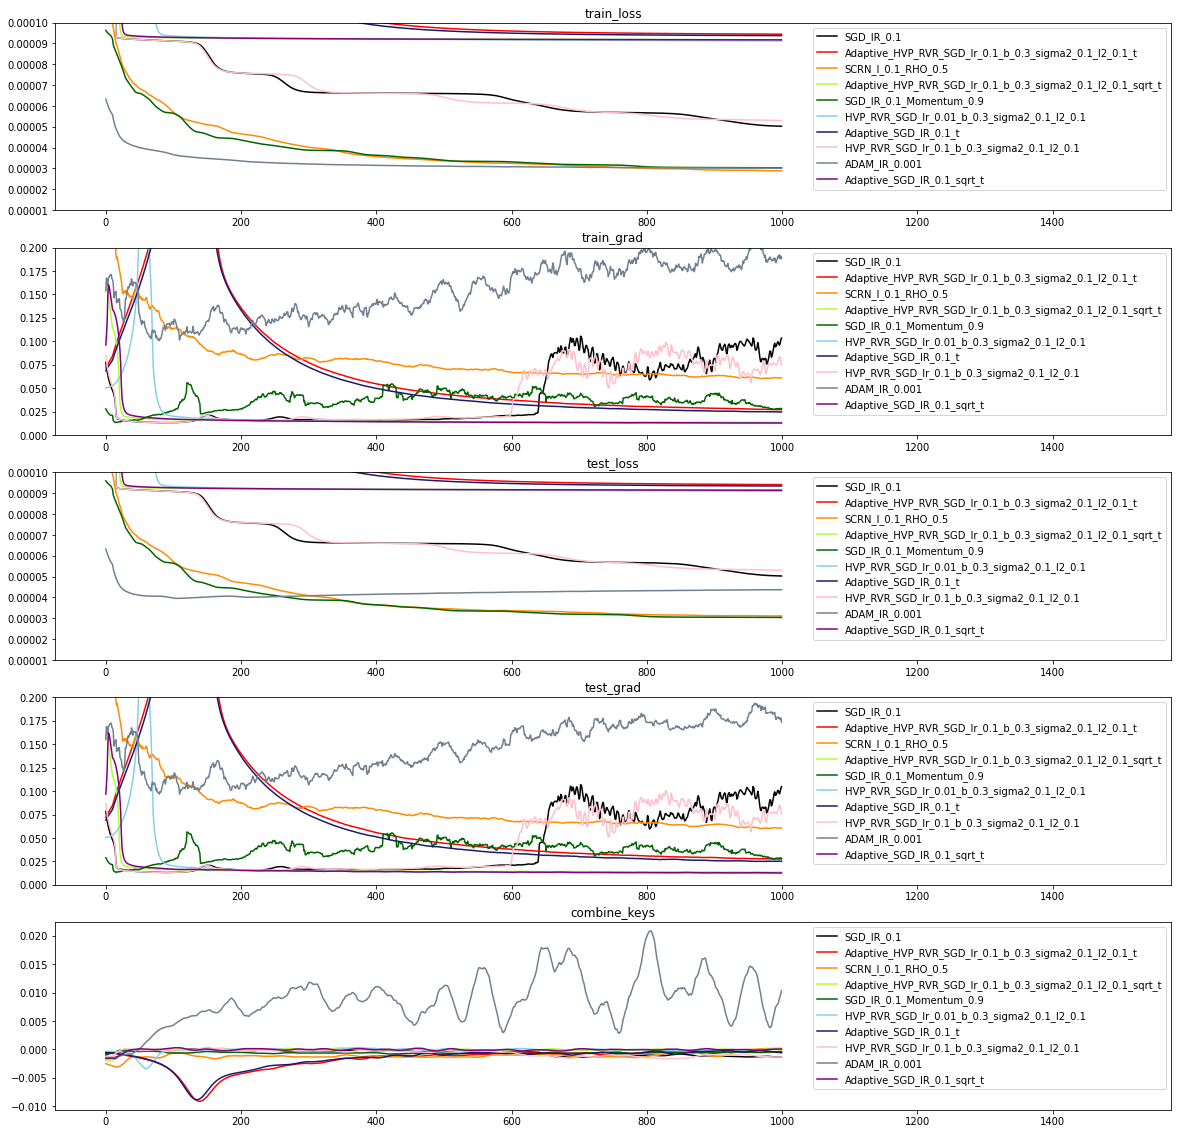

In [74]:
dir='Final_logs/AutoEncoder/'
keys=['train_loss','train_grad','test_loss','test_grad']
y_lim=[[1e-5,1e-4],[0,0.2],[1e-5,1e-4],[0,0.2]]
fig, axs = plt.subplots(5, figsize=(20, 20))
colors=['black','red','darkorange','greenyellow','darkgreen','skyblue','midnightblue','pink','slategrey','purple']
names = os.listdir(dir)
combine_keys=[('train_grad','test_grad',lambda x,y: x-y)]
for i,name in enumerate(names):
    plot_ris(dir + name, axs, keys=keys,name=name,y_lim=y_lim,smooth=True,color=colors[i%len(colors)],combine_keys=combine_keys)
plt.show()